# FINANCIAL INCLUSION PREDICTION MODEL.

`FEATURE SELECTION IN THIS NOTEBOOK IS MAINLY USING *WRAPPER METHODS*`

This notebook attempts to predict the probabilty of an individual having a bank account, given a set of features.

## 1. IMPORTING THE REQUIRED LIBRARIES

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as psfs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


## 2. LOADING THE DATASET

In [100]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
var = pd.read_csv('VariableDefinitions.csv')

print('Train Dataset shape: ', train.shape)
print('Test Dataset shape:', test.shape)

Train Dataset shape:  (23524, 13)
Test Dataset shape: (10086, 12)


In [101]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


The `test dataset has 12` features while the `train dataset aslo has 12 features` and `one target column`

In [102]:
print(var)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

## 3. EXPLORATORY DATA ANALYSIS

### (i) Univarate EDA

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


The `bank_account column` in the `train` dataset is in our case the target column, described by 11 variables.

<AxesSubplot: xlabel='bank_account', ylabel='count'>

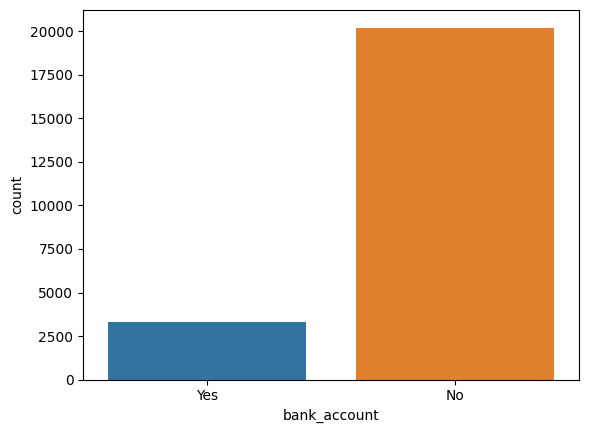

In [105]:
sns.countplot(data = train, x='bank_account')

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The target column is imbalanced, having more instances of *No* than *Yes*

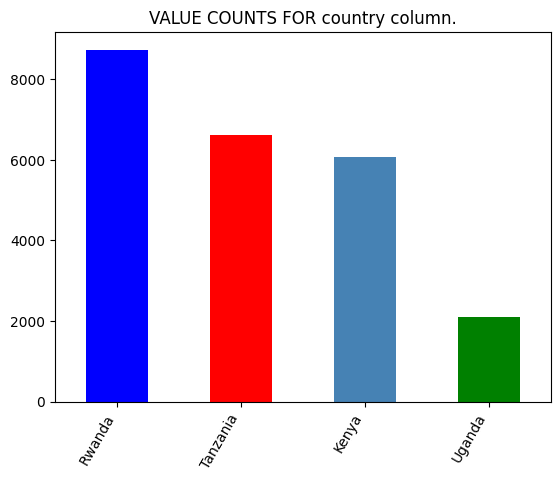

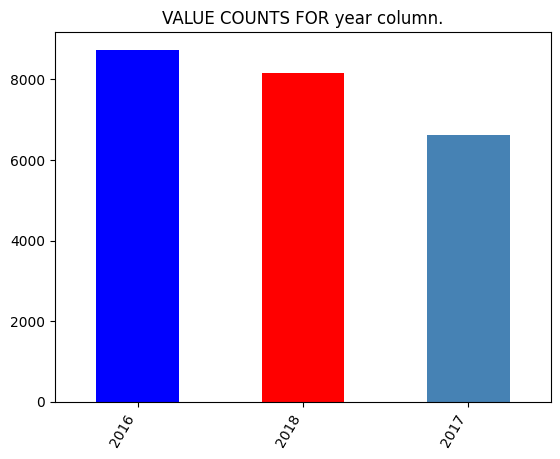

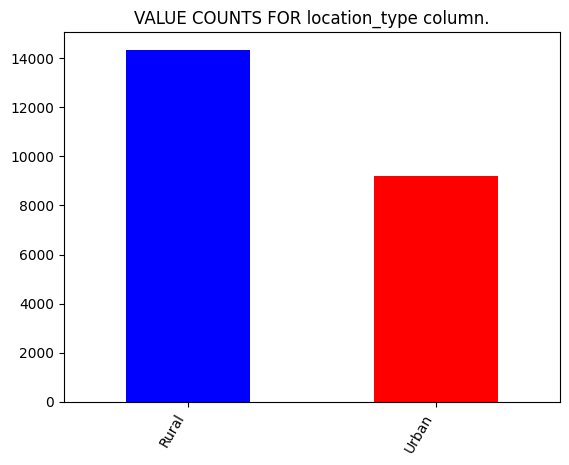

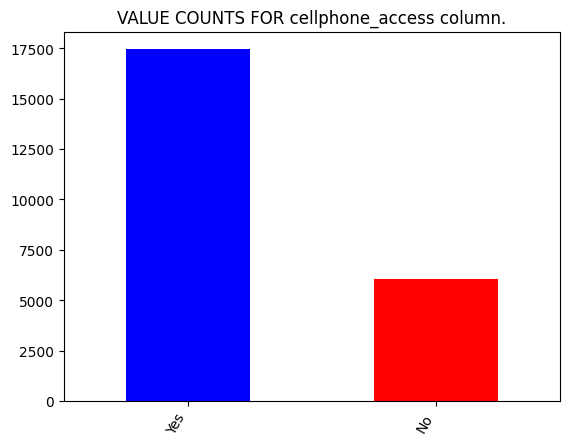

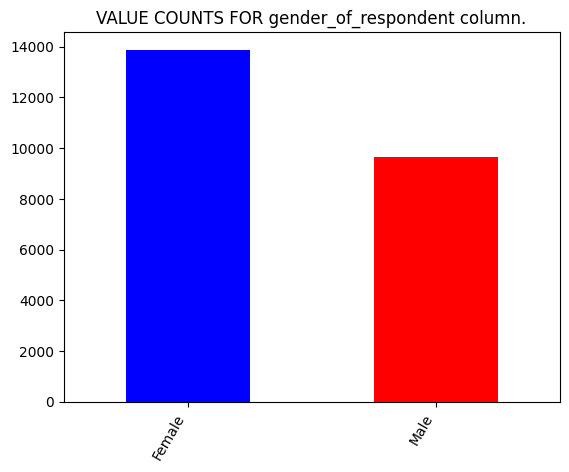

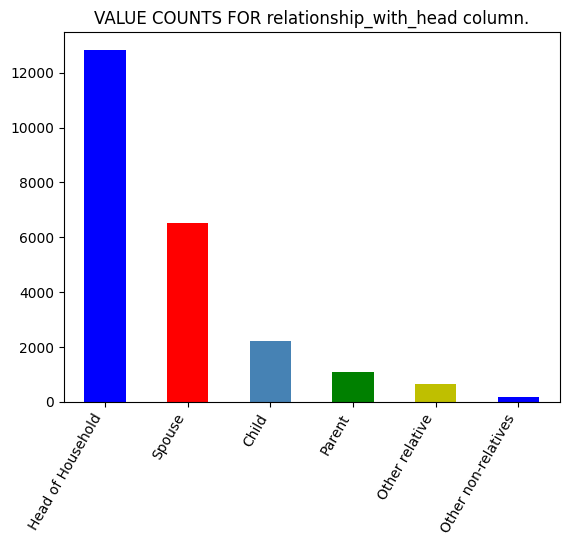

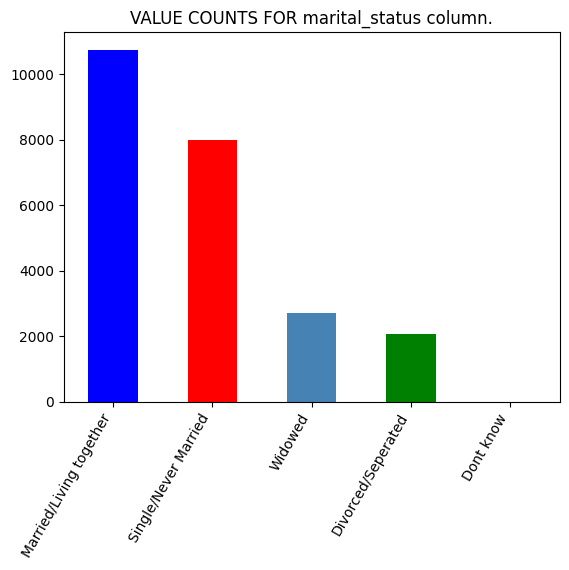

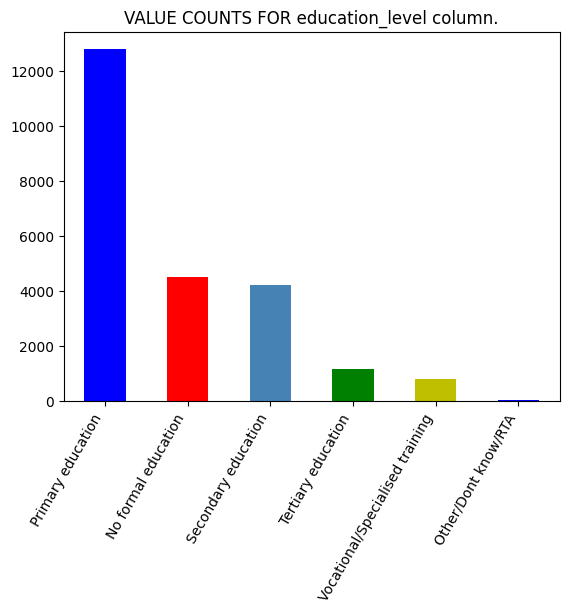

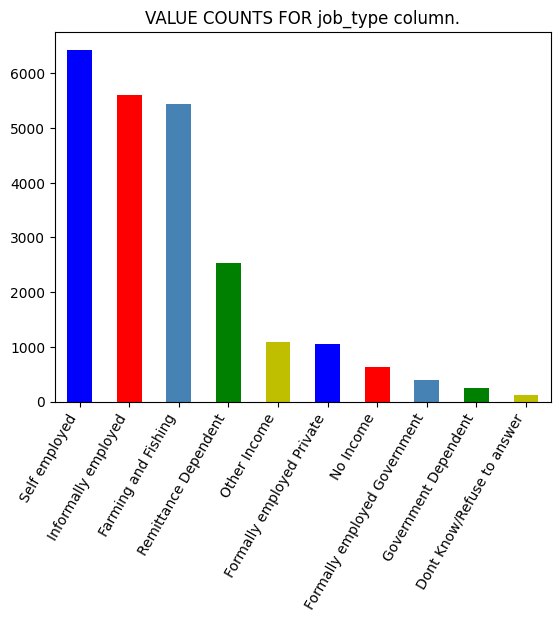

In [107]:
categ = ['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head','marital_status', 'education_level', 'job_type']
colors = ['b', 'r','steelblue', 'g',  'y']

for c in categ:
    if c in train.columns:
        plt.show()
        train[c].value_counts().plot(kind='bar', color=colors)
        plt.xticks(rotation=60, horizontalalignment='right')
        plt.title(f'VALUE COUNTS FOR {c} column.')


From the countplots, the following insights can be made:
1. Most of the individuals had at least *primary level education*.
2. More males than females were interviewed.
3. Most of those interviewed lived in the *rural areas*
4. Most of the individuals were married.
5. Most of those interviewed were from *Rwanda* with the least from *Uganda.*
6. Most of those interviewed *had access to cellphones.*

I also came up with the following hypotheses:
1. People living in *urban* areas are more likely to have bank accounts than those in *rural* areas
2. People *employed formerly* and the *government employed* are more likely to have bank accounts.
3. People with *higher levels* of education are more likely to have bank accounts.
4. *Heads of households* are more likely to have bank accounts.

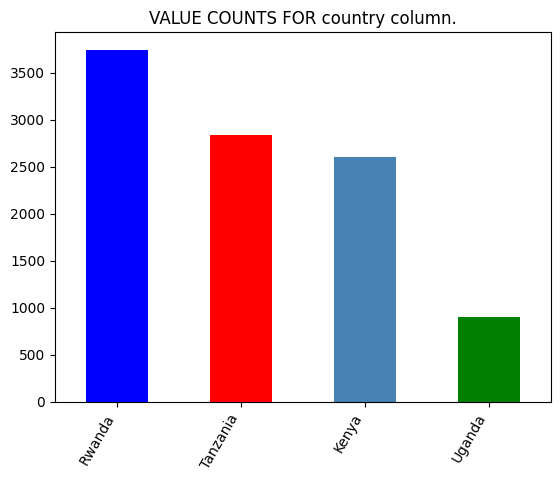

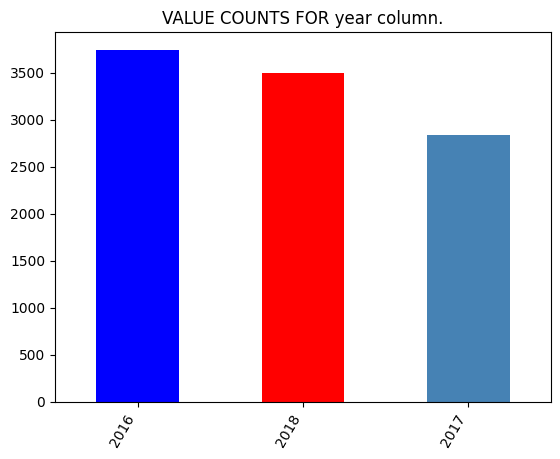

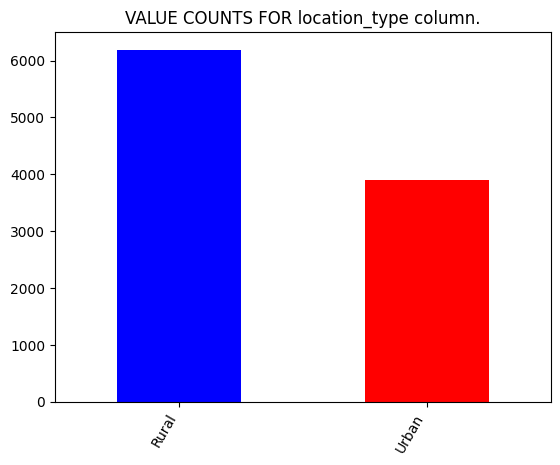

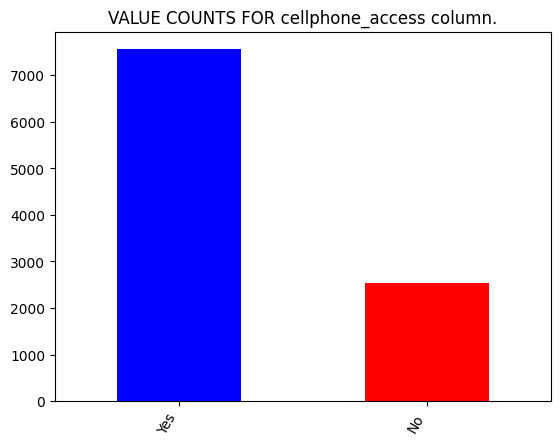

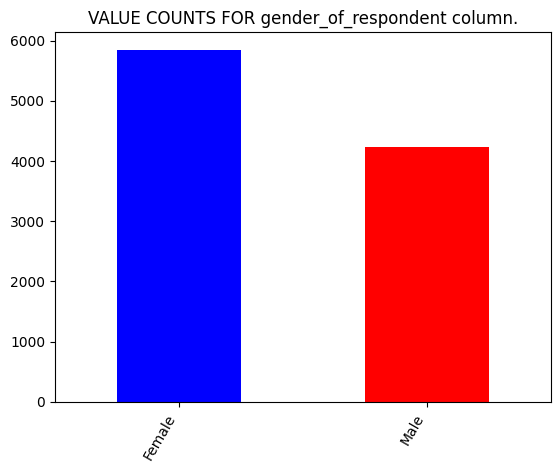

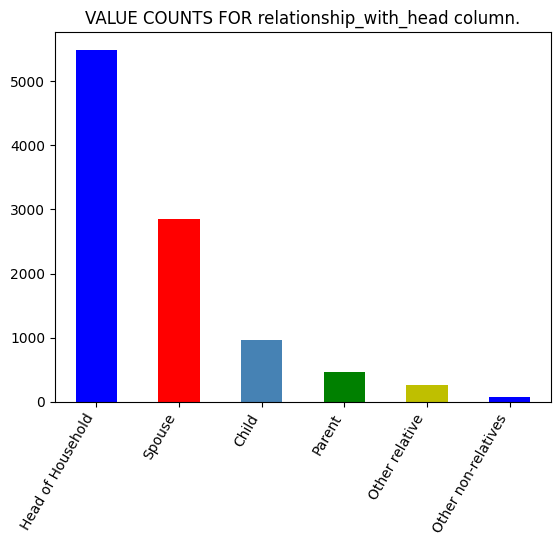

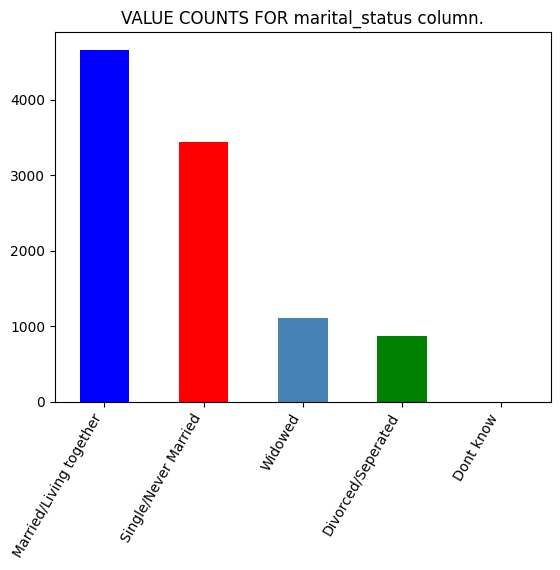

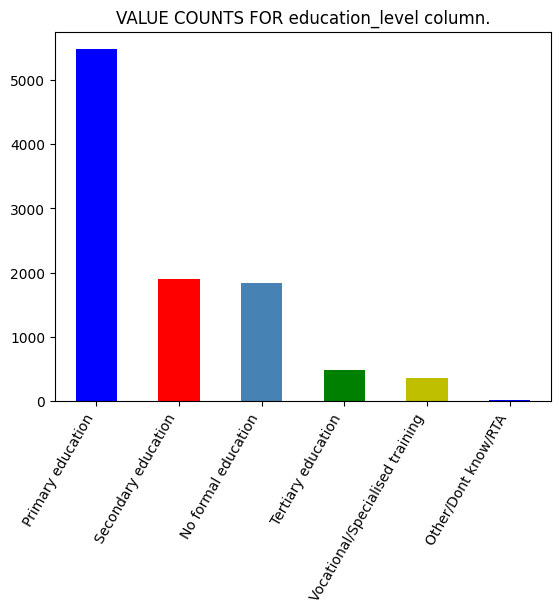

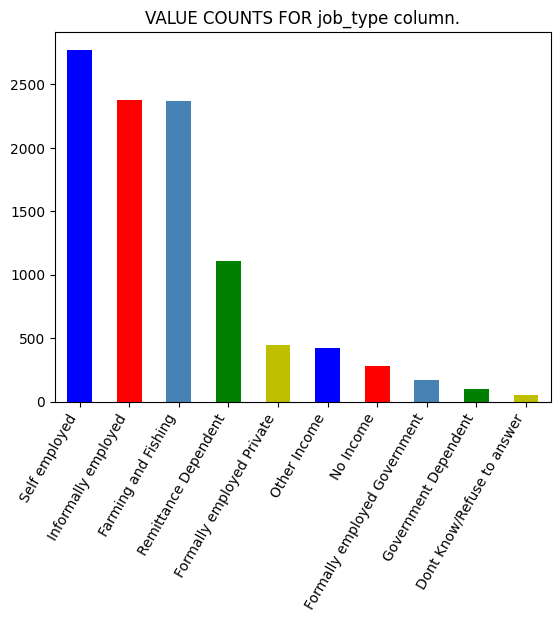

In [108]:
for c in categ:
    if c in test:
        plt.show()
        test[c].value_counts().plot(kind='bar', color=colors)
        plt.xticks(rotation=60, horizontalalignment='right')
        plt.title(f'VALUE COUNTS FOR {c} column.')

The same pattern was evident in the test dataset, `where the hypotheses for the *train* dataset hold.`

### (ii) Bivariate EDA

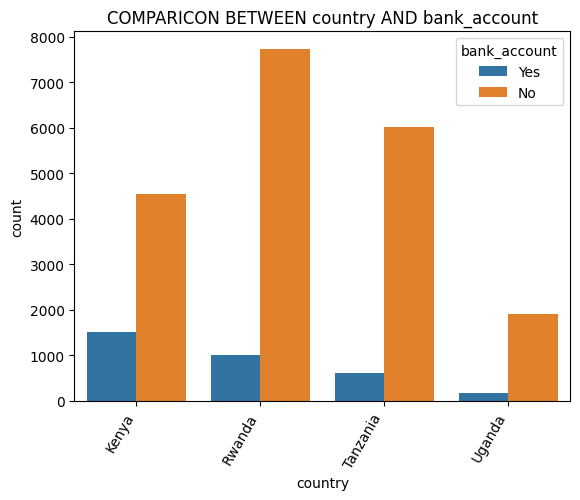

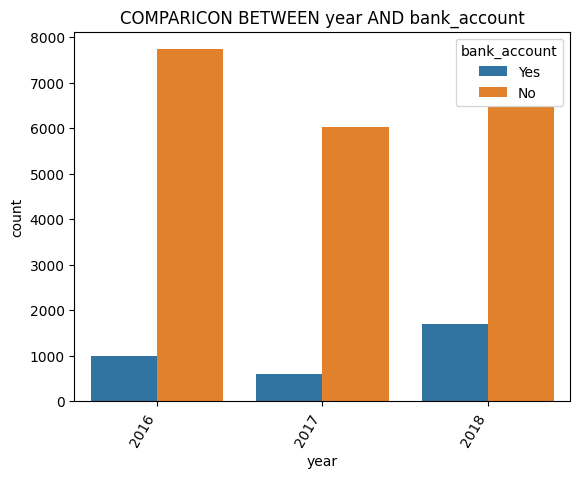

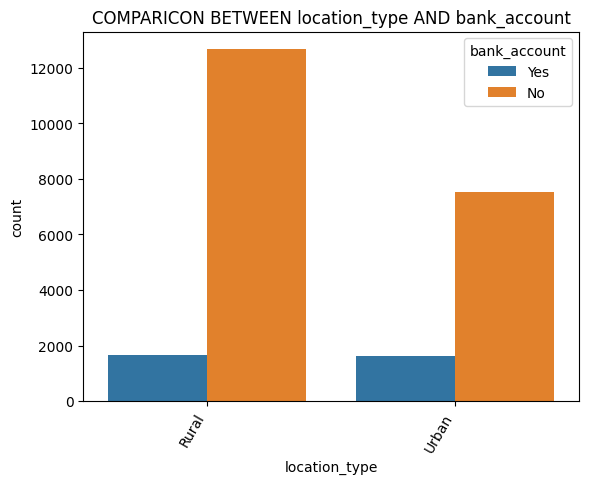

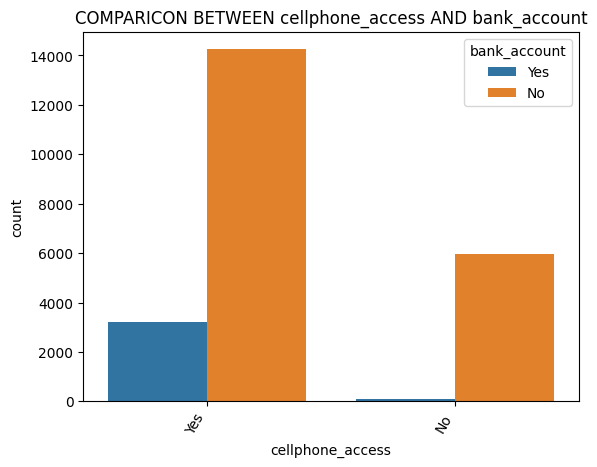

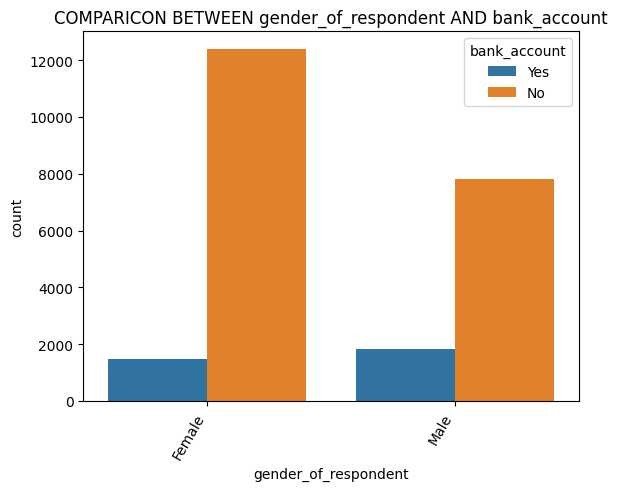

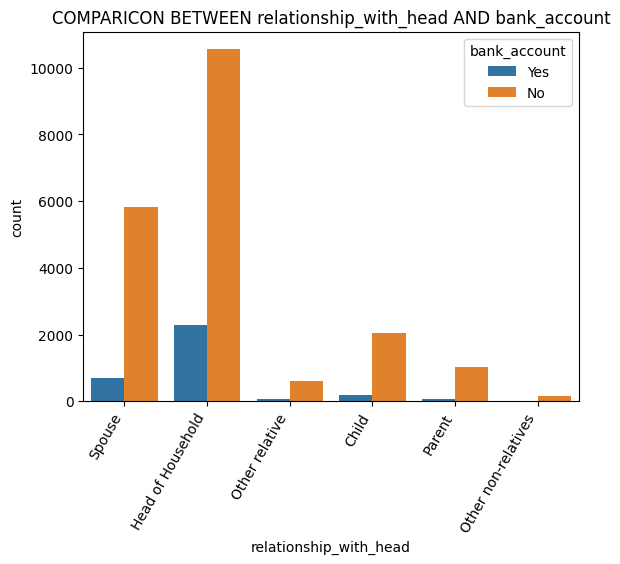

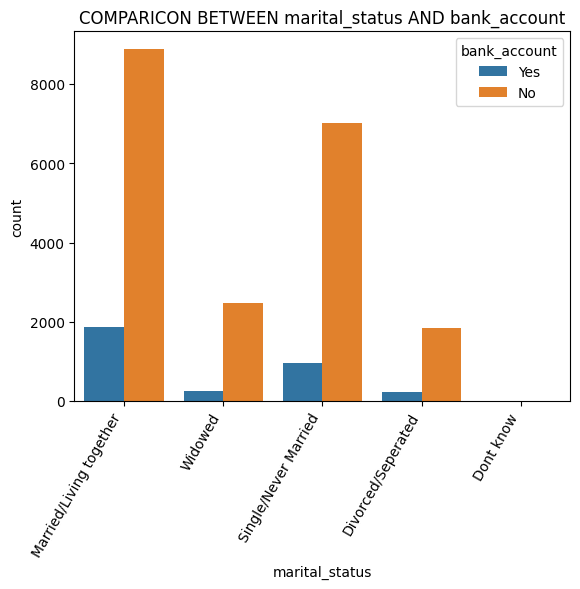

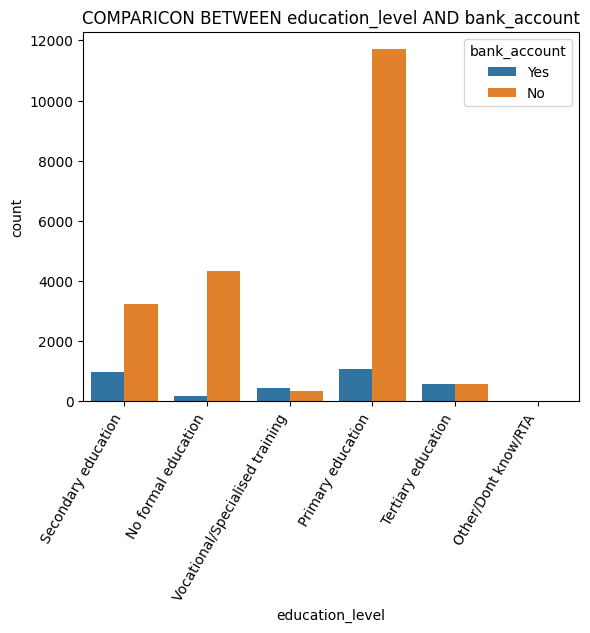

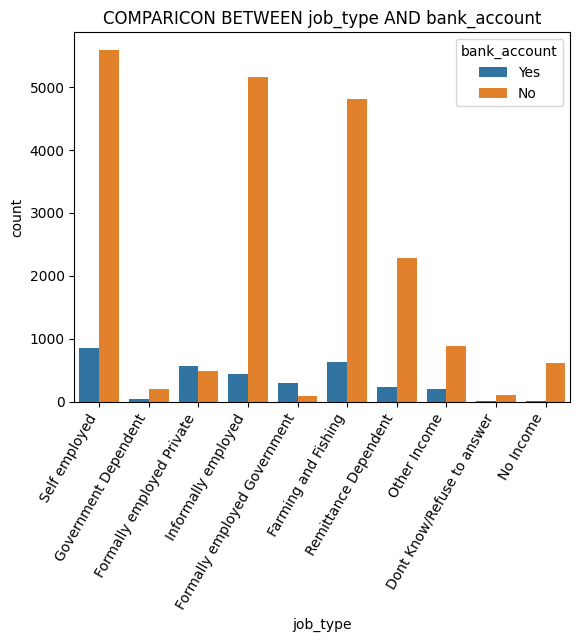

In [109]:
for c in categ:
    if c in train:
        plt.show()
        sns.countplot(data=train, x = c, hue='bank_account')
        plt.xticks(rotation=60,
                   horizontalalignment='right')
        plt.title(f'COMPARICON BETWEEN {c} AND bank_account')

The following insights were derived from the above graphs:
1. Individual in Rwanda and Tanzania had a lower probability of having bank accounts.
2. `Formerly employed individuals (private and government)` had a higher probability of having bank accounts.
3. Individuals with higher level of education `(secondary, vocational/specialised, and tertialy)` had a higher probability of having bank accounts. Can be summarised as, `THE HIGHER THE LEVEL OF EDUCATION, THE HIGHER THE PROBAILITY OF HAVING A BANK ACCOUNT.`
4. Males had a higher probability of having bank accconts compared to women.
5. The earlier the individual surveyed (based on year of survey), the lower the probability of having a bank account, i.e, those interviewed in 2018 had a higher probability of having bank accounts compared to those interviwed in the previous years.

(array([4809., 5480., 4707., 2785., 2164., 1733.,  965.,  640.,  189.,
          52.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <BarContainer object of 10 artists>)

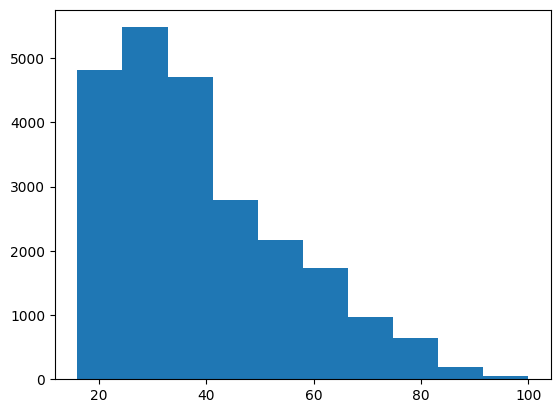

In [110]:
plt.hist(train.age_of_respondent)

The individuals surveyed ranged from around 10 to 100 years, with a peak at around 30 years.

(array([8.286e+03, 7.394e+03, 4.949e+03, 2.151e+03, 5.530e+02, 1.370e+02,
        3.500e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

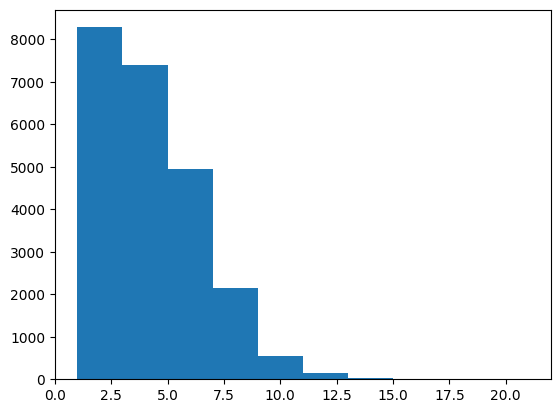

In [111]:
plt.hist(train.household_size)

Most of the families had around two to 5 individuals.

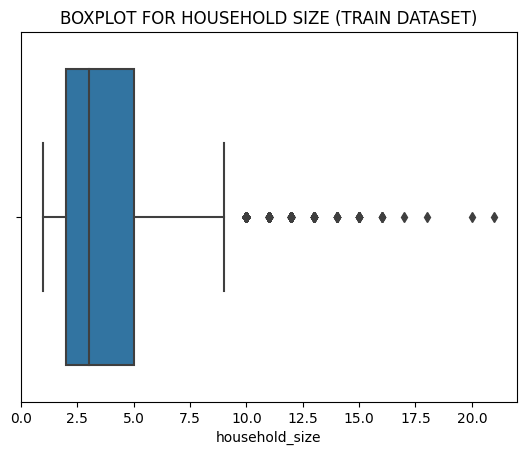

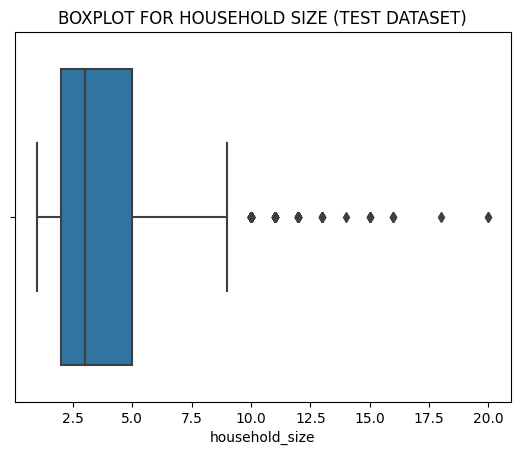

In [112]:
sns.boxplot(data=train, x='household_size')
plt.title('BOXPLOT FOR HOUSEHOLD SIZE (TRAIN DATASET)')
plt.show()

sns.boxplot(data=test, x='household_size')
plt.title('BOXPLOT FOR HOUSEHOLD SIZE (TEST DATASET)')
plt.show()

In [113]:
print(f'MEANS FOR HOUSEHOLD SIZE COLUMNS:\n TRAIN: {train.household_size.mean()} \n TEST: {test.household_size.mean()}')

MEANS FOR HOUSEHOLD SIZE COLUMNS:
 TRAIN: 3.797483421186873 
 TEST: 3.778802300218124


In [114]:
rep = 4 

# function to replace the outliers in the datasets.

def handle(c):
    c['household_size']=np.where(
        c['household_size'] > 9,
        rep,
        c['household_size']
    )

handle(train)
handle(test)

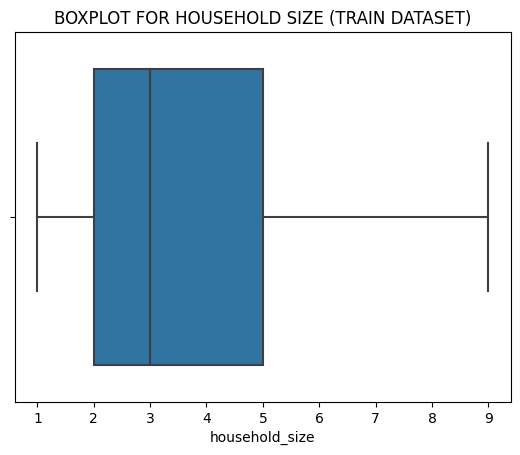

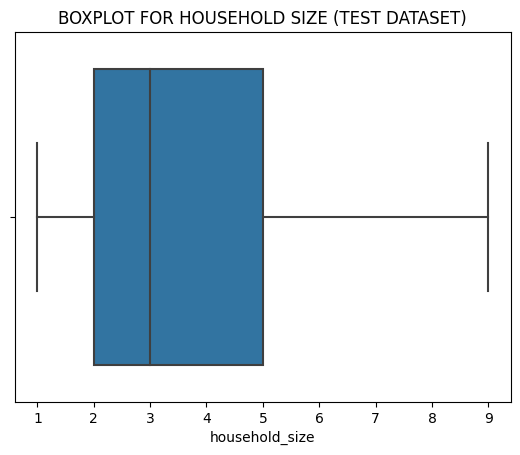

In [115]:
sns.boxplot(data=train, x='household_size')
plt.title('BOXPLOT FOR HOUSEHOLD SIZE (TRAIN DATASET)')
plt.show()

sns.boxplot(data=test, x='household_size')
plt.title('BOXPLOT FOR HOUSEHOLD SIZE (TEST DATASET)')
plt.show()

In [116]:
train.duplicated().sum()

0

The above codes were to handle the outliers and check for duplicates.

## 4. FEATURE ENGINEERING AND FEATURE SELECTION.

In [117]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size               9
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [118]:
# variable holding columns to be converted into numerical format using LabelEncoder
categle= [ 'location_type', 'cellphone_acces', 'gender_of_respondent']
# variable holding columns to be converted into numerical format using OneHotEncoding

categohe = ['country', 'year', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

le = LabelEncoder()

y = le.fit_transform(train['bank_account'])
X = train.drop(['bank_account'], axis=1)
# defining a function to convert the data into numerical format.

def convert(data):
   
    data = pd.get_dummies(data, prefix_sep="_", columns=categohe)
    
    for c in categ:
        if c in data.columns:
            data[c] = le.fit_transform(data[c])

    data.drop(['uniqueid'], axis=1, inplace=True)
    
    scaler= MinMaxScaler()
    data = scaler.fit_transform(data)

    return data

    
X= convert(X)
test = convert(test)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, random_state=0)

max_k = X_train.shape[1]
X_train.shape, X_test.shape


((11762, 39), (11762, 39))

### (i) FEATURE SELECTION

#### 1. Baseline evaluation.

I will perform the following:
1. test perfomance on training using cross validation
2. test perfomance 0n test using hold-out.

In [120]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
cv_acc = cross_val_score(knn, X_train, y_train, cv=10)

print('X_val on training all features: {0:.3f}'.format(cv_acc.mean()))
print('Hold Out testing all features: {0:.3f}'.format(acc))

X_val on training all features: 0.870
Hold Out testing all features: 0.868


#### 2. Sequential Forward Selection

In [121]:
ps = 0

sfs_fwd = sfs(knn,
              k_features=(1, max_k),
              forward=True,
              floating=False,
              verbose=ps,
              scoring='accuracy',
              cv=10, n_jobs=-1)

sfs_fwd = sfs_fwd.fit(X_train, y_train)

The indexes and names of the best performing feature subset.

In [122]:
sfs_fwd.k_feature_idx_

(6, 8, 9, 13, 19, 27, 28, 29, 30, 31, 32, 33, 35)

In [123]:
sfs_fwd.k_feature_names_

('6', '8', '9', '13', '19', '27', '28', '29', '30', '31', '32', '33', '35')

<Figure size 1000x500 with 0 Axes>

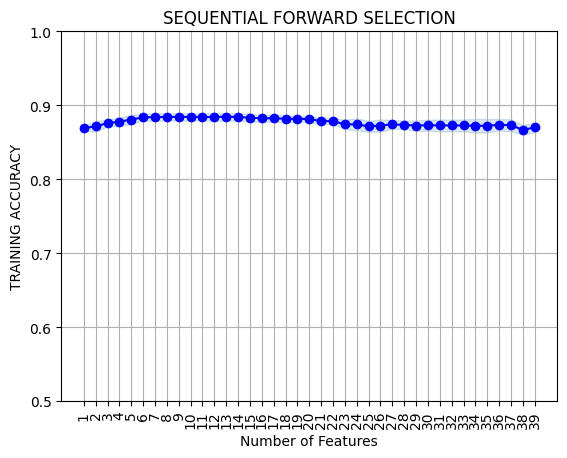

('6', '8', '9', '13', '19', '27', '28', '29', '30', '31', '32', '33', '35')


In [128]:
plt.figure(figsize=(10,5))
fig1 = psfs(sfs_fwd.get_metric_dict(),
            ylabel='TRAINING ACCURACY',
            kind='std_dev')

plt.ylim([0.5, 1])
plt.title('SEQUENTIAL FORWARD SELECTION')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(sfs_fwd.k_feature_names_)

Transforming the Dataset using the selected columns.

In [129]:
X_train_sfs = sfs_fwd.transform(X_train)
X_test_sfs = sfs_fwd.transform(X_test)

knn_sfs = knn.fit(X_train_sfs, y_train)
pred = knn_sfs.predict(X_test_sfs)
acc_SFS = accuracy_score(pred, y_test)
cv_acc_SFS = cross_val_score(knn, X_train_sfs, y_train, cv=10)

print('X_train shape: ', X_train_sfs.shape)
print('X_val on SFS all features: {0:3f}'.format(cv_acc_SFS.mean()))
print('Hold out testing: {0:2d} features selected using SFS: {1:.3f}'.format(len(sfs_fwd.k_feature_idx_), acc_SFS))

X_train shape:  (11762, 13)
X_val on SFS all features: 0.884628
Hold out testing: 13 features selected using SFS: 0.878


#### 3. Backward elimination.

In this exercise, the SFS `forward` parameter is set to `False` to perform `Backward Elimination`

In [130]:
sfs_bwd = sfs(knn,
              k_features=(1, max_k),
              forward=False,
              floating=False,
              verbose=ps,
              scoring='accuracy',
              cv=10, n_jobs=-1)

sfs_bwd = sfs_bwd.fit(X_train, y_train)

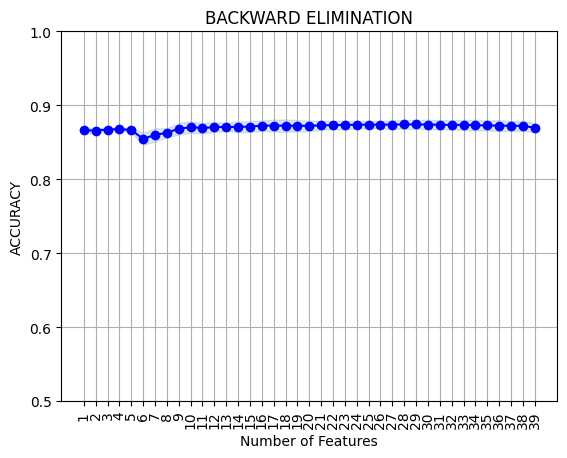

('0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '13', '16', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33', '36', '37', '38')


In [131]:
fig1= psfs(sfs_bwd.get_metric_dict(),
           ylabel='ACCURACY',
           kind='std_dev')

plt.xticks(rotation=90)
plt.ylim([0.5,1])
plt.title('BACKWARD ELIMINATION')
plt.grid()
plt.show()
print(sfs_bwd.k_feature_names_)


In [132]:
sfs_bwd.k_feature_idx_, len(sfs_bwd.k_feature_idx_)

((0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  30,
  31,
  32,
  33,
  36,
  37,
  38),
 29)

In [133]:
X_train_be = sfs_bwd.transform(X_train)
X_test_be = sfs_bwd.transform(X_test)

knn_be = knn.fit(X_train_be,y_train)
pred = knn_be.predict(X_test_be)
acc_BE = accuracy_score(pred, y_test)
cv_acc_BE = cross_val_score(knn, X_train_be, y_train, cv=10)

print('X_train shape: ', X_train_be.shape)
print('X_val on BE all features: {0:.3f}'.format(cv_acc_BE.mean()))
print('Hold Out testing: {0:2d} features selected using BE: {1:.3f}'.format(len(sfs_bwd.k_feature_idx_), acc_BE))


X_train shape:  (11762, 29)
X_val on BE all features: 0.873
Hold Out testing: 29 features selected using BE: 0.867


# PLOTTING THE OVERALL RESULTS.

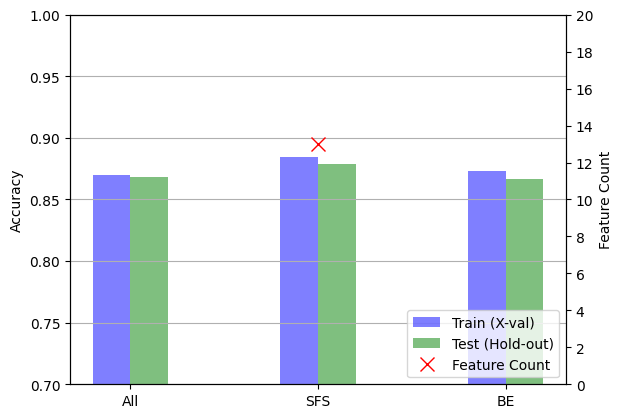

In [137]:
fig, ax = plt.subplots()
width = 0.2

options = ['All', 'SFS', 'BE']
n_feat = [X_train.shape[1], X_train_sfs.shape[1], X_train_be.shape[1]]
accs = [acc,acc_SFS,acc_BE]
xv = [cv_acc.mean(), cv_acc_SFS.mean(), cv_acc_BE.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count',
              marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc='lower right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')

plt.show()